# Analysis of performance - power data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
import scipy as sp
import pickle as pkl
%matplotlib inline

In [205]:
## Import data
file_path = '/Users/yzamora/power/initial_combo_logs/heartbeat_0x1-1200000.log'
df = pd.read_csv(file_path, sep='\s+')
print (df.head())

   Beat  Tag            Timestamp  Global_Rate  Window_Rate  Instant_Rate  \
0     0    0  1527326949297512609     0.000000     0.000000      0.000000   
1     1    1  1527326953058903759     0.531718     0.265859      0.265859   
2     2    2  1527326956838578947     0.397822     0.265214      0.264573   
3     3    3  1527326960616173890     0.353399     0.265049      0.264719   
4     4    4  1527326964388316847     0.331328     0.265062      0.265101   

   Global_Accuracy  Window_Accuracy  Instant_Accuracy  Global_Power  \
0              1.0              1.0               1.0      0.000000   
1              1.0              1.0               1.0      0.793298   
2              1.0              1.0               1.0      0.820799   
3              1.0              1.0               1.0      0.812252   
4              1.0              1.0               1.0      0.808221   

   Window_Power  Instant_Power  
0      0.000000       0.000000  
1      0.793298       0.793298  
2      0.82

## Plotting performance vs power using HeartLogs:

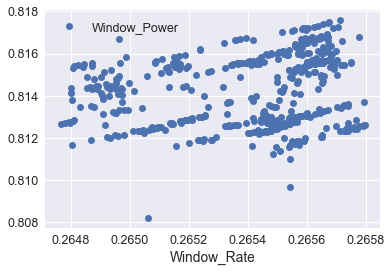

In [208]:
power = df['Window_Rate']
#removing first row, value = 0 
df = df.iloc[1:]
#print( power )
df.plot(x='Window_Rate', y='Window_Power', style='o')


## Performance vs power using STREAM.results
Using combinations of little and bit cores - 881 Combinations

In [75]:
#Import Data
#file_path = '/Users/yzamora/power/STREAM_big.results'
file_path = '/Users/yzamora/power/all.out'

df = pd.read_csv(file_path, sep='\s+')
print (df.head())

  cores    freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
0  0xe6  100000  5.887958  5.439624  461.927430         NaN        NaN
1  0xe6  200000  5.888939  5.474008  464.770101         NaN        NaN
2  0xe6  400000  5.897709  5.441137  461.291977         NaN        NaN
3  0xe6  600000  5.897312  5.442045  461.399975         NaN        NaN
4  0xe6  700000  5.908167  5.432657  459.758156         NaN        NaN


In [176]:

#df.plot(x='Rate', y='Power',kind='scatter',style='o')


## Clock Speed vs Number of Cores

First Converting Hex to Binary, then getting the number of cores being used


In [177]:
def convert_to_bin(df):
    cores_hex = df['cores'].tolist()
    cores_bin = []
    big_cores = []
    lil_cores = []
    total_cores = []
    scale = 16 ## equals to hexadecimal
    num_of_bits = 8

    for i in cores_hex:
    #my_hexdata = "1a" 
        bin_val = bin(int(i, scale))[2:].zfill(num_of_bits)
        ncores=0
        nlittle=0
        nbig=0
        for j in range(len(bin_val)): 
            ncores+=int(bin_val[j])
            if j<4: nbig+=int(bin_val[j])
            else: nlittle+=int(bin_val[j])
        #print(bin_val+" big, little, total: "+str(nbig)+" "+str(nlittle)+" "+str(ncores))
        cores_bin.append(bin_val)
        big_cores.append(nbig)
        lil_cores.append(nlittle)
        total_cores.append(ncores)


    #print (cores_bin)
    df['big_cores'] = big_cores
    df['lil_cores'] = lil_cores
    df['total_cores'] = total_cores
    

    print(df.head())
    return df



In [199]:
#Creating columns for core positions
import numpy
def create_col(df):
    
    
    new_cols = {  'core-0': [], 
                  'core-1': [],  
                  'core-2': [], 
                  'core-3': [], 
                  'core-4': [], 
                  'core-5': [], 
                  'core-6': [],
                  'core-7': [] }
    
    current_row = []
    cores_hex = df['cores'].tolist()
    cores_bin = []
    big_cores = []
    lil_cores = []
    total_cores = []
    scale = 16 ## equals to hexadecimal
    num_of_bits = 8

    for i in cores_hex:
    #my_hexdata = "1a" 
        bin_val = bin(int(i, scale))[2:].zfill(num_of_bits)
        ncores=0
        nlittle=0
        nbig=0
        for j in range(len(bin_val)):
            dict_key = 'core-'+str(j)
            new_cols[ dict_key ].append( int( bin_val[ j ] ) )
            ncores+=int(bin_val[j])
            if j<4: nbig+=int(bin_val[j])
            else: nlittle+=int(bin_val[j])
        #print(bin_val+" big, little, total: "+str(nbig)+" "+str(nlittle)+" "+str(ncores))
        cores_bin.append(bin_val)
        big_cores.append(nbig)
        lil_cores.append(nlittle)
        total_cores.append(ncores)


    #print (cores_bin)
    df['big_cores'] = big_cores
    df['lil_cores'] = lil_cores
    df['total_cores'] = total_cores

    for j in range(len(bin_val)):
        dict_key = 'core-'+str(j)
        df[dict_key] = new_cols[dict_key]
    
    print(df)
    return df
    

In [200]:
#create_col(df)

df = create_col(df)

print(df)
#df = convert_to_bin(df)
#df.plot(x='total_cores', y='Rate',kind='scatter',style='o')

    cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0    0xe6   100000  5.887958  5.439624  461.927430         NaN        NaN   
1    0xe6   200000  5.888939  5.474008  464.770101         NaN        NaN   
2    0xe6   400000  5.897709  5.441137  461.291977         NaN        NaN   
3    0xe6   600000  5.897312  5.442045  461.399975         NaN        NaN   
4    0xe6   700000  5.908167  5.432657  459.758156         NaN        NaN   
5    0xe6   800000  5.893648  5.440728  461.575041         NaN        NaN   
6    0xe6  1000000  5.892087  5.463399  463.621307         NaN        NaN   
7    0xe6  1200000  5.879515  5.468053  465.008695         NaN        NaN   
8    0xe6  1400000  5.890988  5.457655  463.220651         NaN        NaN   
9    0xda   100000  5.904099  5.387178  456.223404         NaN        NaN   
10   0xda   200000  5.900255  5.434772  460.553992         NaN        NaN   
11   0xda   400000  5.891115  5.452016  462.731679         NaN        NaN   

# Preliminary data analysis

In [201]:
import matplotlib.pyplot as plt
from numpy.random import random
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Scatter plot looking at relation between core number, power, and rate

Text(0.5,0,'Core Rate')

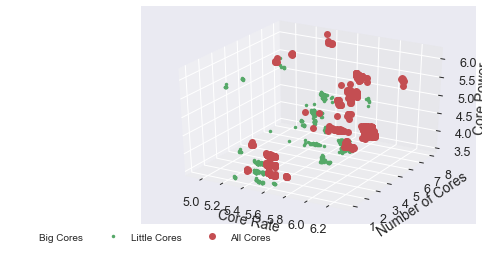

In [202]:
#colors = ['b', 'c']

#colors=['blue', 'c', 'y', 'm', 'r']
core_lil = df['lil_cores'].values
core_rate = df['Rate'].values
core_big = df['big_cores'].values
core_power = df['Power'].values
core_all = df['total_cores'].values
ax = plt.subplot(111,projection='3d')
ax.plot(core_rate, core_big, core_power,'x',label ='Big Cores')
ax.plot(core_rate, core_lil, core_power,'.',label ='Little Cores')
ax.plot(core_rate, core_all, core_power,'o',label ='All Cores')

#ax.legend()
plt.legend(loc='upper center', numpoints=1, ncol=3, fontsize=10, bbox_to_anchor=(0, 0))
ax.set_zlabel('Core Power')
ax.set_ylabel("Number of Cores")
ax.set_xlabel("Core Rate")



## Correlation heat map 

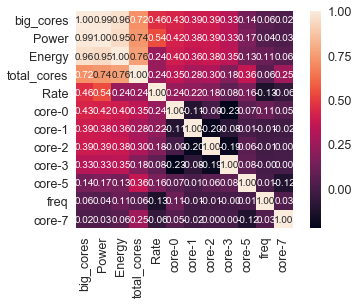

In [157]:
corrmat = df.corr()
k = 12
cols = corrmat.nlargest(k, "big_cores")["big_cores"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Kernel density estimate and histogram: Power, Rate, Core number

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



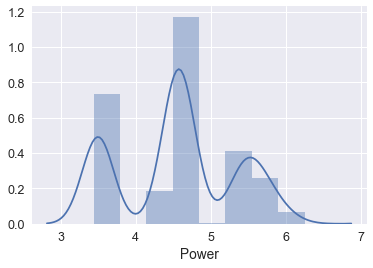

In [162]:
sns.distplot(df['Power'])
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



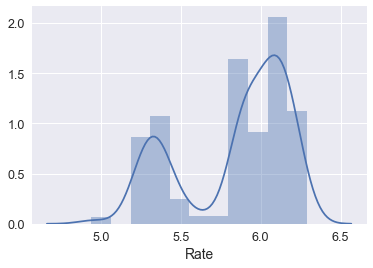

In [163]:
sns.distplot(df['Rate'])
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



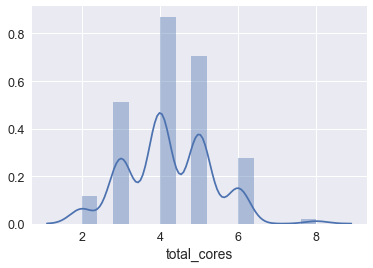

In [164]:
sns.distplot(df['total_cores'])
plt.show()

## Bivarite Analysis

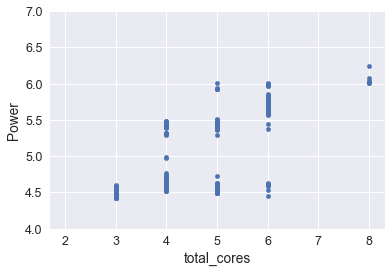

In [175]:
data = pd.concat([df["total_cores"], df["Power"]], axis=1)
data.plot.scatter(x="total_cores", y="Power", ylim=(4,7));
plt.show()

### Cleaning up data
Removing hex cores, nan cores, big cores, and little cores

In [65]:
df = df.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY','big_cores','lil_cores','total_cores'])
#

In [66]:
print(df.head())
X = df[['freq','core-0','core-1','core-2','core-3','core-4','core-5','core-6','core-7']]
y = df['Power']

print ("X size:", X.shape)
print ("y size", y.shape)

     freq      Rate     Power      Energy  core-0  core-1  core-2  core-3  \
0  100000  5.887958  5.439624  461.927430       1       1       1       0   
1  200000  5.888939  5.474008  464.770101       1       1       1       0   
2  400000  5.897709  5.441137  461.291977       1       1       1       0   
3  600000  5.897312  5.442045  461.399975       1       1       1       0   
4  700000  5.908167  5.432657  459.758156       1       1       1       0   

   core-4  core-5  core-6  core-7  
0       0       1       1       0  
1       0       1       1       0  
2       0       1       1       0  
3       0       1       1       0  
4       0       1       1       0  
X size: (881, 9)
y size (881,)


## Using Random Forest Regressor

In [210]:
model = GridSearchCV(RandomForestRegressor(n_estimators=100),
                     param_grid=dict(max_features=range(4,9)),
                     scoring='neg_mean_squared_error',
                    cv=10)
#CV = how it does cross validation, 10 = 10 fold cross validation

In [211]:
model.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(4, 9)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

Text(0,0.5,'RMSD')

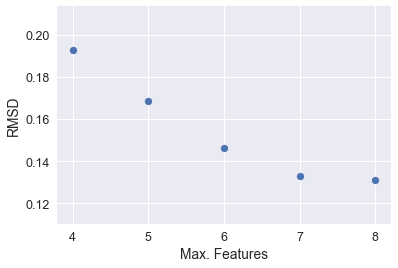

In [213]:
fig, ax = plt.subplots()
ax.scatter(model.cv_results_['param_max_features'].data,
          np.sqrt(-1 * model.cv_results_['mean_test_score']))
ax.set_xlabel('Max. Features')
ax.set_ylabel('RMSD')


### Get the best model based on these parameter selections

In [214]:
print (model.best_params_)

{'max_features': 8}


In [215]:
model = model.best_estimator_

## Smaller cores seem to have more importance

In [217]:
list(zip(X.columns,model.feature_importances_))

[('freq', 0.00428108064987326),
 ('core-0', 0.22362001715177127),
 ('core-1', 0.23836391838006613),
 ('core-2', 0.2318281672892055),
 ('core-3', 0.28605054525885554),
 ('core-4', 0.004009845149127406),
 ('core-5', 0.004649914303588796),
 ('core-6', 0.004160172004258998),
 ('core-7', 0.003036339813252998)]

## Estimating Prediction Accuracy

In [218]:
all_y_test = np.zeros((0,))
all_y_pred = np.zeros((0,))
#given options and list of data, returns the indices of training and test sets 
for train_inds, test_inds in ShuffleSplit(n_splits=5, test_size=0.1).split(X,y):
    # Split off the train and test set
    X_test, y_test = X.iloc[test_inds, :], y[test_inds]
    X_train, y_train = X.iloc[train_inds, :], y[train_inds]
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Append the results
    all_y_test = np.concatenate((all_y_test, y_test))
    #print (all_y_test)
    all_y_pred = np.concatenate((all_y_pred, y_pred))

### Print out Scores

In [220]:
print ("R:", sp.stats.pearsonr(all_y_test, all_y_pred)[0])
print ("MAE:", np.abs(all_y_test - all_y_pred).mean(), 'Watts')
print ("RMSE:", np.sqrt(np.power(all_y_test - all_y_pred, 2).mean()), 'Watts')

R: 0.9989198311897333
MAE: 0.01682789791171748 Watts
RMSE: 0.035310376683450065 Watts


## Plotting results of prediction vs results

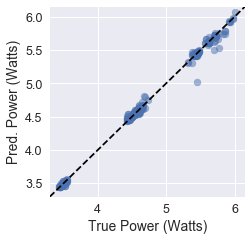

In [235]:
fig, ax = plt.subplots()

# Make the plot
ax.scatter(all_y_test, all_y_pred, alpha=0.5)

# Make it pretty
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('True Power (Watts)')
ax.set_ylabel('Pred. Power (Watts)')

fig.set_size_inches(3.5, 3.5)

# Add in the goal line
ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--');

### Train the model and save it

In [222]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## Example use of prediction model 
Predicting power given frequency and core assignment

In [225]:
pkl.dump(model, open('power_pred-model.pkl', 'wb'))

In [226]:
with open ("power_pred-model.pkl", 'rb') as fp:
    model2 = pkl.load(fp)
print (model2)
model2.predict([[400000,0,1,0,0,0,0,0,1]])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


array([3.54779814])

## Looking at little cores and big cores relationships
Function plot_biglil plots rate vs number of cores for both big, little, and core combinations

In [227]:
def plot_biglil(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x=(df['Rate']),y=(df['big_cores']), label='Big Cores')
    ax1.scatter(x=(df['Rate']),y=(df['lil_cores']), label='Little Cores')
    ax1.scatter(x=(df['Rate']),y=(df['total_cores']), label='Total Cores')
    plt.legend(loc='best');
    ax1.set_xlabel("Rate")
    ax1.set_ylabel("Core Count")
    plt.show()


In [228]:
#print (df)


## New Results 'bigger results' of bit and little cores
Running with various core combinations:
10001 10001 , 1100 1100, 1010 1010, 1000 1000, 1111 1111, 1000 1111, 1010 1111, 1111 0001, 1111 0101, 0101 0101

Frequency Combinations: 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 2000000

In [229]:
#Import Data
#file_path = '/Users/yzamora/power/STREAM.results'
file_path = '/Users/yzamora/power/all.out'

long_df = pd.read_csv(file_path, sep='\s+')
print (long_df.tail())

    cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
876  0xd3   700000  5.893981  5.411821  459.097222         NaN        NaN
877  0xd3   800000  5.895936  5.421249  459.744142         NaN        NaN
878  0xd3  1000000  5.896034  5.427183  460.239771         NaN        NaN
879  0xd3  1200000  5.895737  5.430571  460.550434         NaN        NaN
880  0xd3  1400000  5.894369  5.441322  461.569388         NaN        NaN


In [230]:
long_df = convert_to_bin(long_df)
print (long_df)

  cores    freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0  0xe6  100000  5.887958  5.439624  461.927430         NaN        NaN   
1  0xe6  200000  5.888939  5.474008  464.770101         NaN        NaN   
2  0xe6  400000  5.897709  5.441137  461.291977         NaN        NaN   
3  0xe6  600000  5.897312  5.442045  461.399975         NaN        NaN   
4  0xe6  700000  5.908167  5.432657  459.758156         NaN        NaN   

   big_cores  lil_cores  total_cores  
0          3          2            5  
1          3          2            5  
2          3          2            5  
3          3          2            5  
4          3          2            5  
    cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0    0xe6   100000  5.887958  5.439624  461.927430         NaN        NaN   
1    0xe6   200000  5.888939  5.474008  464.770101         NaN        NaN   
2    0xe6   400000  5.897709  5.441137  461.291977         NaN        NaN   
3    0xe6   6

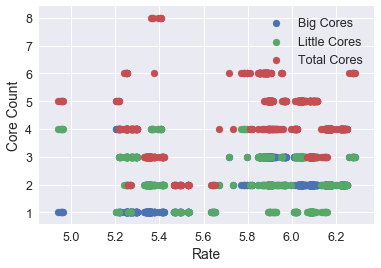

In [231]:
plot_biglil(long_df)

## Using only Mixed Cores (No all big or all little)

In [59]:
#Import Data
file_path = '/Users/yzamora/power/all.out'
df_mixed = pd.read_csv(file_path, sep='\s+')
print(df_mixed.head)

<bound method NDFrame.head of     cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
0    0xe6   100000  5.887958  5.439624  461.927430         NaN        NaN
1    0xe6   200000  5.888939  5.474008  464.770101         NaN        NaN
2    0xe6   400000  5.897709  5.441137  461.291977         NaN        NaN
3    0xe6   600000  5.897312  5.442045  461.399975         NaN        NaN
4    0xe6   700000  5.908167  5.432657  459.758156         NaN        NaN
5    0xe6   800000  5.893648  5.440728  461.575041         NaN        NaN
6    0xe6  1000000  5.892087  5.463399  463.621307         NaN        NaN
7    0xe6  1200000  5.879515  5.468053  465.008695         NaN        NaN
8    0xe6  1400000  5.890988  5.457655  463.220651         NaN        NaN
9    0xda   100000  5.904099  5.387178  456.223404         NaN        NaN
10   0xda   200000  5.900255  5.434772  460.553992         NaN        NaN
11   0xda   400000  5.891115  5.452016  462.731679         NaN        NaN
12   0xd